In [17]:
#Exercise 1
import sys
assert sys.version_info >= (3,5)

IS_COLAB = 'google.colab' in sys.modules
IS_KAGGLE = 'kaggle_secrets' in sys.modules

#!pip install scikit-learn
import sklearn
assert sklearn.__version__ >= '0.20'


import numpy as np
import os

np.random.seed(42)

#!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rchlr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


(70000, 784)
(70000,)
Saving figure some_digit_plot


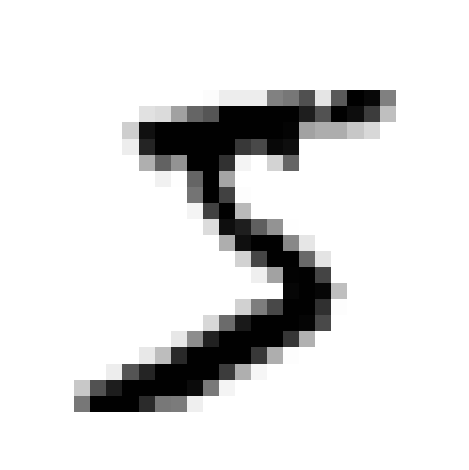

In [44]:
#!pip install pandas
import pandas as p
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

X=mnist.data
y=mnist.target.astype(int)

print(X.shape)
print(y.shape)

some_digit= X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis('off')

save_fig('some_digit_plot')
plt.show()

In [45]:
#Extra
def plot_digits(instances, images_per_row =10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances)- 1) // images_per_row +1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis= 0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis('off')

    plt.figure(figsize = (9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row = 10)
save_fig('more_digits_plot')
plt.show()

In [36]:
#Exercise 2

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [38]:
X_train.shape

(60000, 784)

In [39]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [46]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol= None, random_state=40)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=40, tol=None)

In [47]:
#Exercise 3

import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Measuring Accuracy
#1.0
accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("Accuracy scores using cross_val_score:", accuracy_scores)

Accuracy scores using cross_val_score: [0.9584  0.96815 0.8876 ]


In [52]:
#Cross Validation using StratifiedKFold
#1.1
skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = SGDClassifier(max_iter = 5, tol=None, random_state=40)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    accuracy = np.mean(y_pred == y_test_folds)
    print('Accuracy using StratifiedKFold:', accuracy)

Accuracy using StratifiedKFold: 0.9608
Accuracy using StratifiedKFold: 0.96085
Accuracy using StratifiedKFold: 0.93965


In [53]:
#Using confusion matrix
#2
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
conf_matrix = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[52285  2294]
 [ 1423  3998]]


In [54]:
#Precision, Recall, F1 Score
#3

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6354100445009536
Recall: 0.7375023058476295
F1 Score: 0.6826602919832665


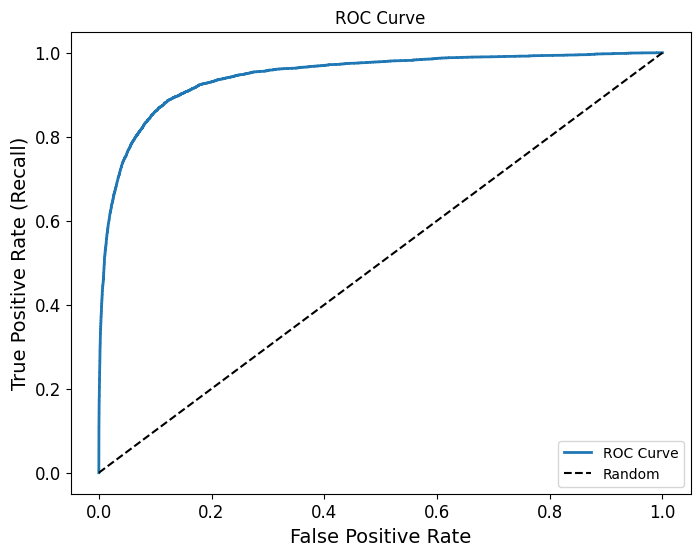

In [56]:
#ROC Curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()


The purpose of creating a classifier is to categorize input data into predefined classes using the training data, and subsequently, use this knowledge to predict the labels of the test data.

Upon achieving this, it becomes crucial to assess the accuracy of the predictive model. In exercise 3, we utilized accuracy, the confusion matrix, precision, recall, F1 score, and ROC curve measurements to evaluate the effectiveness of our predictive model.

Although the various methods for obtaining accuracy consistently yielded results above ~93%, it's important to note that this metric may not be suitable when dealing with imbalanced datasets. Analyzing our confusion matrix, we observed 52,285 true positives, 2,294 false negatives, 1,423 false positives, and 3,998 true negatives. The impact on precision (0.6354) is evident, and this discrepancy is further highlighted by a higher recall (0.7375), which places emphasis on true positives. The F1 score, representing a balance between precision and recall, addresses the trade-off between false positives and false negatives.

Considering these metrics, along with the illustration of the ROC curve, it can be concluded that this model does a decent job distinguishing between the two classes.